# Importing the libraries

In [223]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Creating random values for x and y from 0 to 50

In [224]:
x=[]
y=[]
for i in range (0,1000):
    number1 = random.randint(0,50)
    x.append(number1)

for i in range (0,1000):
    number2 = random.randint(0,50)
    y.append(number2)

In [225]:
columns = {"x":x, "y":y}
data = pd.DataFrame(columns)

In [226]:
data

,x,y
0,30,4
1,32,7
2,47,26
3,16,39
4,16,17
...,...,...
995,8,47
996,46,12
997,33,28
998,23,18


In [227]:
x = data.iloc[:,0].values
y = data.iloc[:,-1].values

# Creating test train split for linear regression model

In [228]:
train_size = int(0.7 * len(data))
train_set = data[:train_size]
test_set = data[train_size:]

# Splitting test and train values for x and y

In [229]:
x_train = train_set['x'] # x is the name of the column
x_test = test_set['x']
y_train = train_set['y'] # y is the name of the column
y_test = test_set['y']

# Simple linear regression function

In [230]:
def simple_LR(inp,output):
    Xi = inp
    Yi = output
    N = len(Xi)
    
    Yi_mean = Yi.mean()
    Xi_mean = Xi.mean()
        
    S_YiXi = (Yi*Xi).sum()
    Yi_Xi_ByN = (Yi.sum() * Xi.sum()) / N
    
    S_XiXi = (Xi*Xi).sum()
    XiXi_ByN = (Xi.sum() * Xi.sum()) / N
    
    slope = (S_YiXi - Yi_Xi_ByN) / (S_XiXi - XiXi_ByN)
    
    intercept = Yi_mean - slope * Xi_mean
    
    return (intercept,slope)

# Slope and intercept of training data

In [231]:
train_intercept , train_slope = simple_LR(x_train,y_train)
y_pred1= train_slope*x+train_intercept
print ("Slope = ",train_slope)
print ("Intercept = ",train_intercept)

Slope =  0.06618638346274501
Intercept =  23.830807034221657


# Prediction using the model

In [232]:
def regpred(inp,intercept,slope):
    predicted_values = inp*slope + intercept
    
    return predicted_values

In [233]:
#Predicting for a random test point
test_point = 15

est_point = regpred(test_point,train_intercept,train_slope)
print ("Estimated Value of Y :",est_point)

Estimated Value of Y : 24.82360278616283


# Gradient descent to find slope and intercept

In [234]:
m=c=0
rate=0.0001

for i in range(100000): 
    y_pred=m*x+c
    deriv_m=(-2/1000)*sum(x*(y-y_pred))
    deriv_c=(-2/1000)*sum(y-y_pred)
    m=m-rate*deriv_m
    c=c-rate*deriv_c    
print("Slope = ",m,"\nIntercept = :",c)
y_pred2 = m*x+c

Slope =  0.017771773646077085 
Intercept = : 25.04009456210012


# Slope and intercept using sklearn

In [235]:
from sklearn.model_selection import train_test_split
X=[]
j=0
for i in x:
    X.append([])
    X[j].append(i)
    j=j+1
Y=[]
j=0
for i in y:
    Y.append([])
    Y[j].append(i)
    j=j+1
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,
                                                random_state=420)

In [236]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [237]:
m=reg.coef_
c=reg.intercept_
print("Slope = ",m[0][0],"\nIntercept = ",c[0])
y_pred3 = m[0][0]*x+c[0]

Slope =  0.005864783127053398 
Intercept =  25.261067554674963


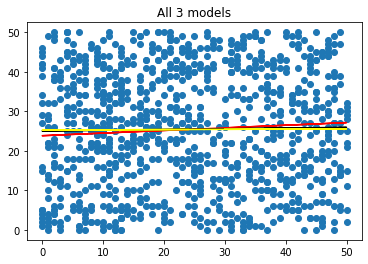

In [238]:
plt.title("All 3 models")
plt.scatter(x,y)
plt.plot(x,y_pred1,color="red")
plt.plot(x,y_pred2,color="black")
plt.plot(x,y_pred3,color="yellow")